# 1. Import Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/42028/AT2

/content/drive/MyDrive/Colab_Notebooks/42028/AT2


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset_42028assg2_13165319.zip -d /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/100466.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/101738.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/100557.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/100882.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/100474.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/100408.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/100327.txt  
  inflating: /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Object_Detection/yolo/train/labels/101351.txt  
  inf

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset

/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset


In [ ]:
ls

Image_Classification/  Object_Detection/


#2. Import Library

In [ ]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# 3. Visualizing datasets

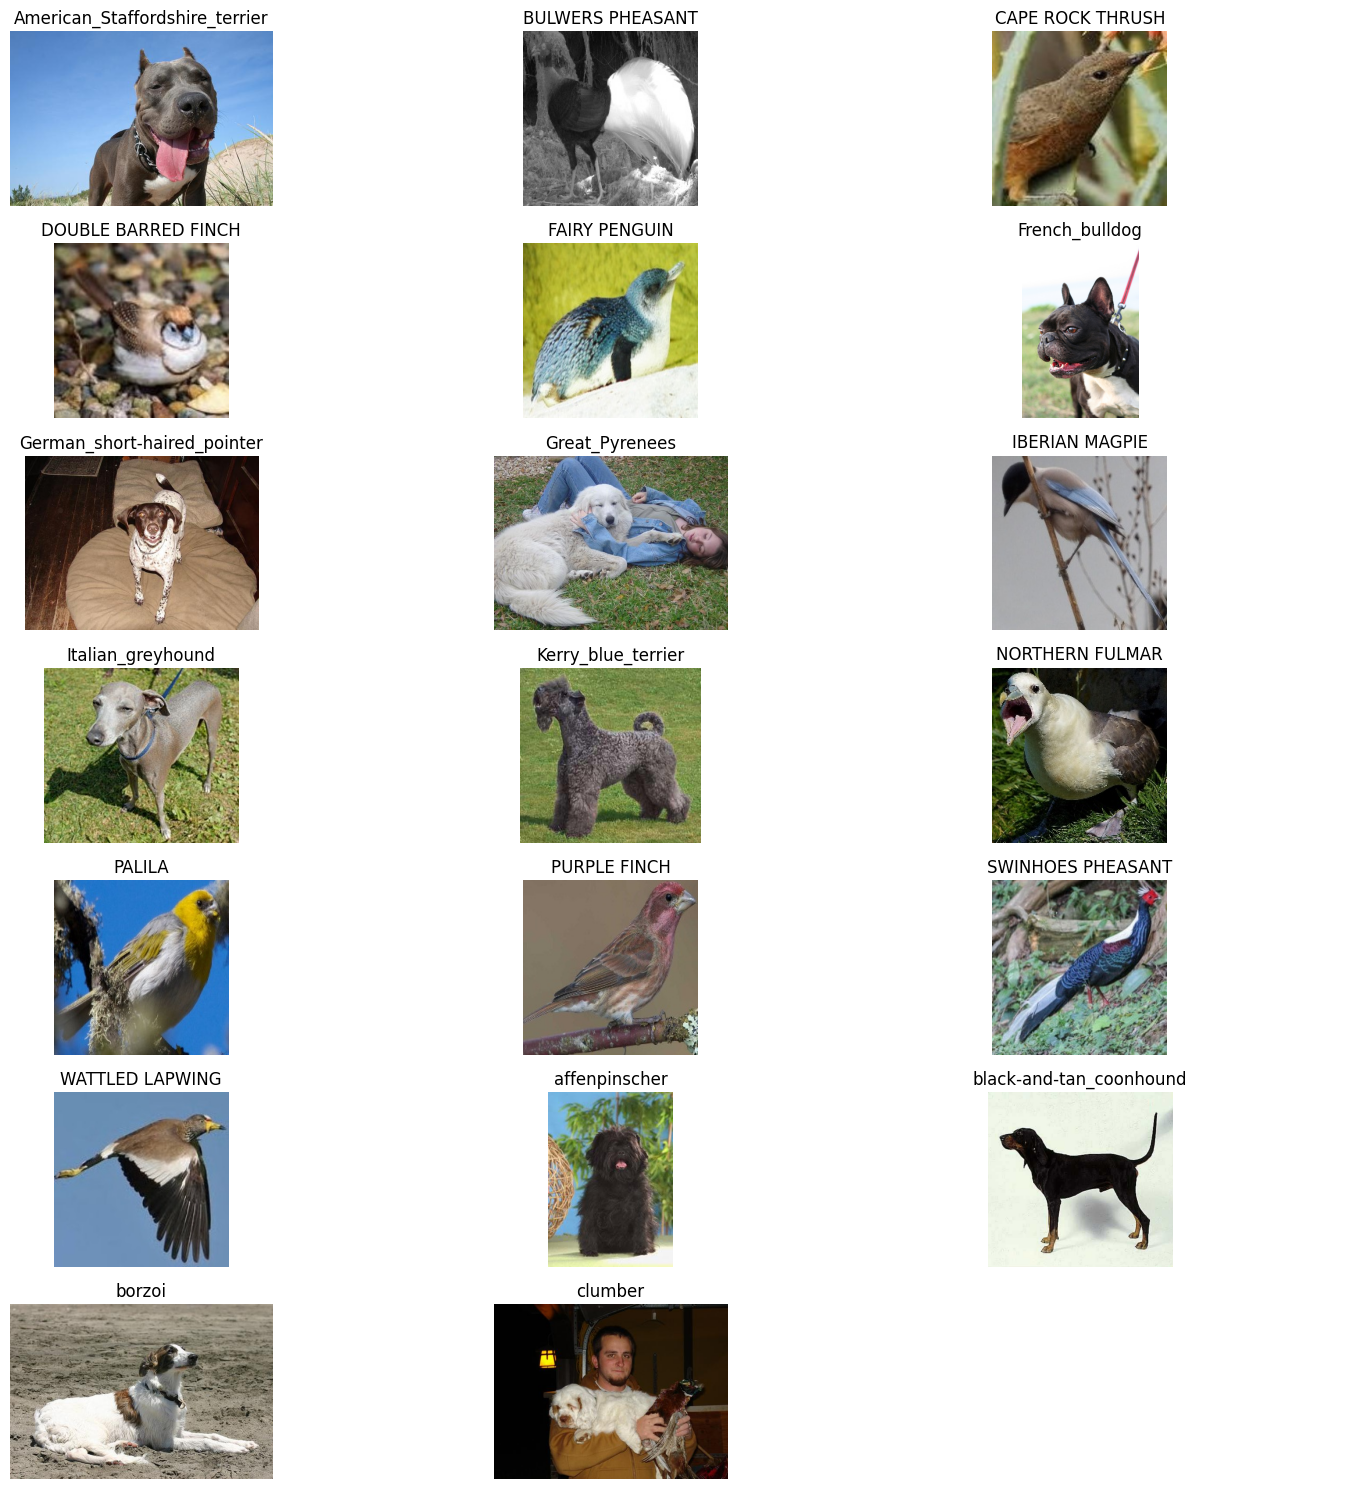

In [ ]:
# Define dataset path
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Image_Classification/dataset_13165319'

# Get a list of categories
categories = os.listdir(dataset_path)

# Set the number of images displayed in each row
num_columns = 3

# Count rows
num_rows = len(categories) // num_columns
if len(categories) % num_columns != 0:
    num_rows += 1

# Create subgraph
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Go through each category and randomly select an image to visualize
for i, cls in enumerate(categories):
    # Get category path
    category_path = os.path.join(dataset_path, cls)
    # Get all images in this category
    images = os.listdir(category_path)
    # If there are no images in this category, skip it
    if len(images) == 0:
        continue
    # randomly select a picture
    random_image = random.choice(images)
    # Image path
    image_path = os.path.join(category_path, random_image)
    # Read and display images
    img = mpimg.imread(image_path)
    row = i // num_columns
    col = i % num_columns
    if num_rows == 1:
        axes[col].imshow(img)
        axes[col].set_title(cls)
        axes[col].axis('off')
    else:
        axes[row, col].imshow(img)
        axes[row, col].set_title(cls)
        axes[row, col].axis('off')

# If the last row is not filled with pictures, hide the remaining sub-pictures
if len(categories) % num_columns != 0:
    for j in range(len(categories) % num_columns, num_columns):
        axes[num_rows - 1, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


##Using cmap=gray for grayscale image visualisation

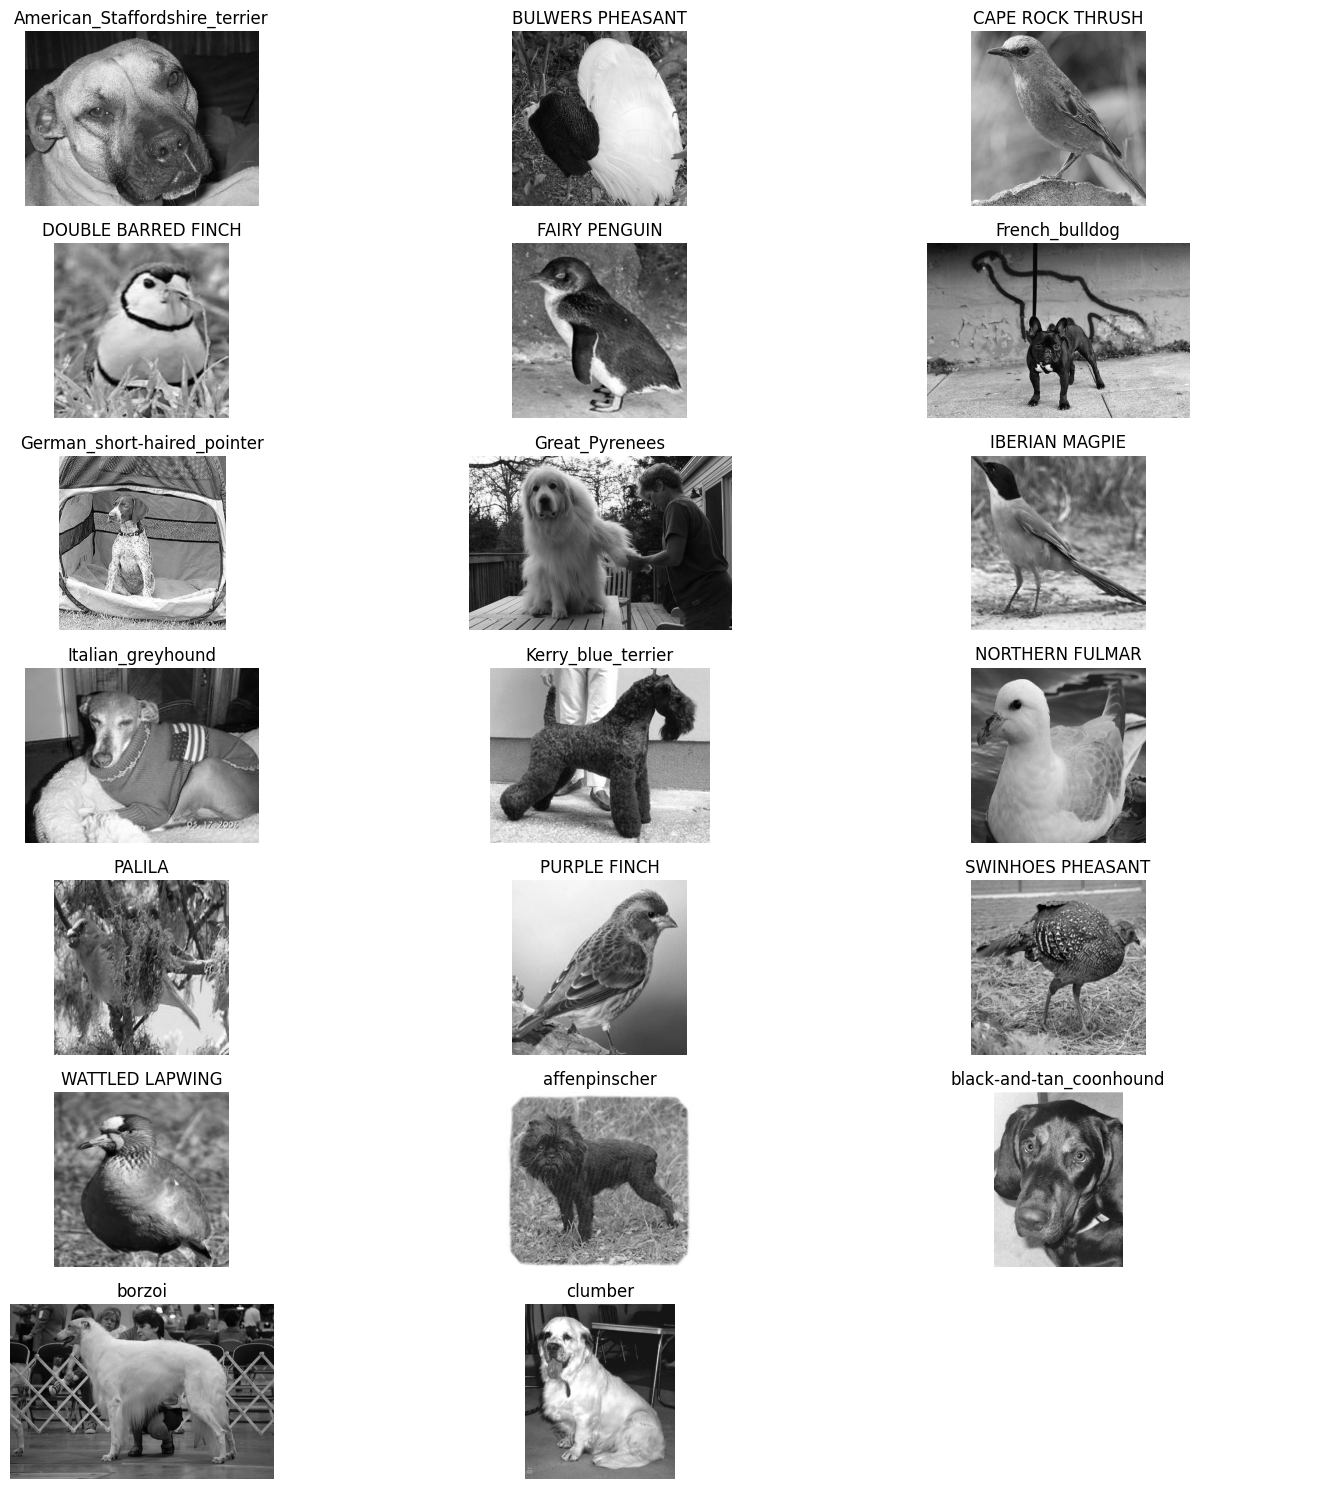

In [ ]:
# Define dataset path
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Image_Classification/dataset_13165319'

# Get a list of categories
categories = os.listdir(dataset_path)

# Set the number of images displayed in each row
num_columns = 3

# Count rows
num_rows = len(categories) // num_columns
if len(categories) % num_columns != 0:
    num_rows += 1

# Create subgraph
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Go through each category and randomly select an image to visualize
for i, cls in enumerate(categories):
    # Get category path
    category_path = os.path.join(dataset_path, cls)
    # Get all images in this category
    images = os.listdir(category_path)
    # If there are no images in this category, skip it
    if len(images) == 0:
        continue
    # Randomly select a picture
    random_image = random.choice(images)
    # Image path
    image_path = os.path.join(category_path, random_image)
    # Read and display images
    img = mpimg.imread(image_path)
    # If the image is not in grayscale, convert it
    if img.ndim == 3:
        img = np.mean(img, axis=2)
    row = i // num_columns
    col = i % num_columns
    if num_rows == 1:
        axes[col].imshow(img, cmap='gray')
        axes[col].set_title(cls)
        axes[col].axis('off')
    else:
        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].set_title(cls)
        axes[row, col].axis('off')

# If the last row is not filled with pictures, hide the remaining sub-pictures
if len(categories) % num_columns != 0:
    for j in range(len(categories) % num_columns, num_columns):
        axes[num_rows - 1, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#4. Splitting the dataset

In [ ]:
# Define the dataset folder path
data_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/Image_Classification/dataset_13165319"

# Define the folder paths for the train set, valid set, and test set
train_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder/train"
valid_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder/valid"
test_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder/test"

# Create train set, valid set and test set folders
os.makedirs(train_folder, exist_ok=True)
os.makedirs(valid_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each category folder under the dataset folder
for folder in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder)
    if os.path.isdir(folder_path):
        # Create training, validation, and test subfolders of the category folder
        os.makedirs(os.path.join(train_folder, folder), exist_ok=True)
        os.makedirs(os.path.join(valid_folder, folder), exist_ok=True)
        os.makedirs(os.path.join(test_folder, folder), exist_ok=True)

        # Get all image file paths under the category folder
        images = [os.path.join(folder_path, image) for image in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, image))]

        # Random image file paths in order
        random.seed(13165319)# Set as student ID
        random.shuffle(images)

        # Calculate the index range of the train set, valid set and test set
        num_images = len(images)
        train_index = int(0.8 * num_images)
        valid_index = int(0.9 * num_images)

        # Split the image file path into train set, velid set and test set
        train_images = images[:train_index]
        valid_images = images[train_index:valid_index]
        test_images = images[valid_index:]

        # Copy the image files of the train set, valid set and test set to the corresponding folders
        for image in train_images:
            shutil.copy(image, os.path.join(train_folder, folder))
        for image in valid_images:
            shutil.copy(image, os.path.join(valid_folder, folder))
        for image in test_images:
            shutil.copy(image, os.path.join(test_folder, folder))

In [ ]:
os.listdir('/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder')

['train', 'valid', 'test']

In [ ]:
# Define the folder paths for the train set, valid set, and test set
# Before opening the file for training next time, it can define the path
train_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder/train"
valid_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder/valid"
test_folder = "/content/drive/MyDrive/Colab_Notebooks/42028/AT2/dataset/ImageFolder/test"


##Image enhancement

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image enhancement (image rescale, image horizontal flipping, image rotation, width shift, height shift)
train_datagen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)


# Images are split into batches of 30 for training
train_generator = train_datagen.flow_from_directory(
        train_folder,  # This is the source directory for training images
        target_size=(224, 224),  # The size of the image is defined as 224*224
        batch_size=30,
        # Because we want to use binary cross entropy, Binary must be used for classification here.
        class_mode='categorical') # categorical is multi-category

# Images are split into batches of 30 for training
test_generator = test_datagen.flow_from_directory(
        test_folder, # This is the source directory for test images
        target_size= (224, 224),
        batch_size= 30,
        shuffle= False,
        class_mode='categorical')

# Images are split into batches of 30 for training
validation_generator = validation_datagen.flow_from_directory(
        valid_folder,  # This is the source directory for validation image
        target_size=(224, 224),
        batch_size=30,
        class_mode='categorical')

Found 2561 images belonging to 20 classes.
Found 331 images belonging to 20 classes.
Found 318 images belonging to 20 classes.


In [ ]:
len(train_generator.class_indices) #Check the number of categories

20

#5. Beseline Model Architecture

In [ ]:
from tensorflow.keras import layers, models, Model

def VGG16(input_shape=(224, 224, 3), n_classess=20):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    # Classification block
    model.add(layers.Flatten(name='flatten'))
    model.add(layers.Dense(1028, activation='relu', name='fc1'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1028, activation='relu', name='fc2'))
    model.add(layers.Dense(n_classess, activation='softmax', name='predictions'))

    return model


In [ ]:
from keras.layers import Dropout
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
#Architecture
baseline_vgg =  VGG16(input_shape=(224, 224, 3), n_classess=20)


##Baseline model structure summary

In [ ]:
baseline_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

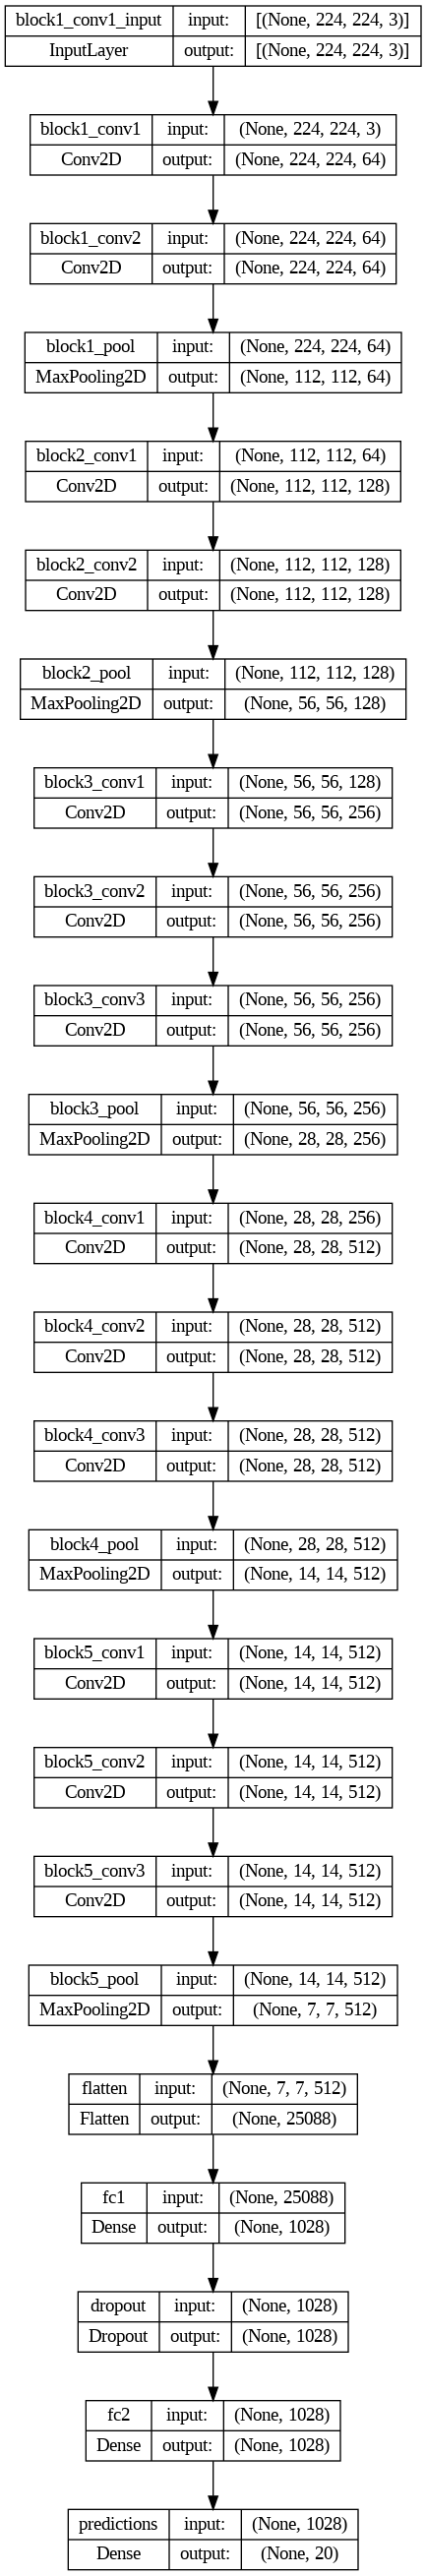

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(baseline_vgg, show_shapes=True, show_layer_names=True)

## Training Model

In [ ]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
# https://keras.io/api/optimizers/adam/
baseline_vgg.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

filepath="/content/drive/MyDrive/Colab_Notebooks/42028/AT2/Baseline_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
batch_size=30
history = baseline_vgg.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(train_generator.samples/batch_size),  # n images = batch_size * steps
      epochs= 80,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples/batch_size),  # n images = batch_size * steps
      verbose=1)

<ipython-input-14-657c2d15b4ca>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = baseline_vgg.fit_generator(


Epoch 1/80
86/86 [==============================] - 1218s 14s/step - loss: 2.9956 - acc: 0.0605 - val_loss: 2.9936 - val_acc: 0.0660
Epoch 2/80
86/86 [==============================] - 55s 635ms/step - loss: 2.9946 - acc: 0.0664 - val_loss: 2.9926 - val_acc: 0.0660
Epoch 3/80
86/86 [==============================] - 57s 662ms/step - loss: 2.9941 - acc: 0.0664 - val_loss: 2.9912 - val_acc: 0.0660
Epoch 4/80
86/86 [==============================] - 55s 642ms/step - loss: 3.0009 - acc: 0.0668 - val_loss: 2.9924 - val_acc: 0.0660
Epoch 5/80
86/86 [==============================] - 55s 644ms/step - loss: 2.9926 - acc: 0.0664 - val_loss: 2.9904 - val_acc: 0.0660
Epoch 6/80
86/86 [==============================] - 56s 646ms/step - loss: 2.9913 - acc: 0.0664 - val_loss: 2.9836 - val_acc: 0.0660
Epoch 7/80
86/86 [==============================] - 55s 644ms/step - loss: 2.9690 - acc: 0.0722 - val_loss: 2.9334 - val_acc: 0.0755
Epoch 8/80
86/86 [==============================] - 55s 635ms/step - 

##Save model into Google Drive

In [ ]:
baseline_vgg.save('/content/drive/MyDrive/Colab_Notebooks/42028/AT2/baseline_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Load model from Google Drive

In [ ]:
from tensorflow import keras
baseline_vgg = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/42028/AT2/baseline_vgg16.h5')

##Draw training curve

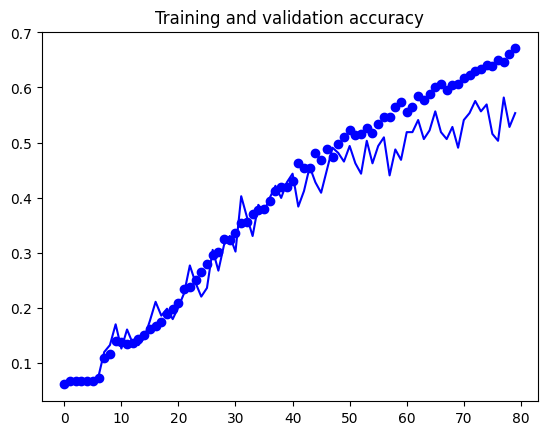

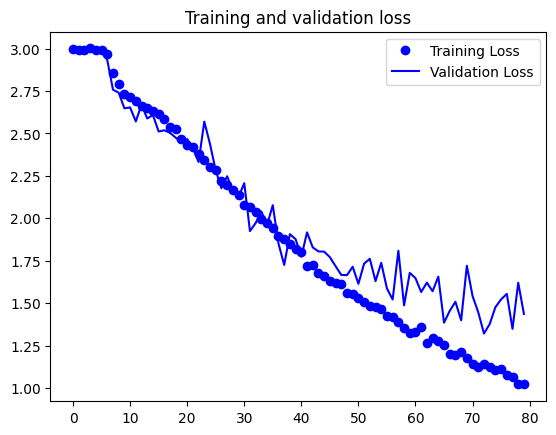

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print('Evaluation Train dataset',baseline_vgg.evaluate(train_generator))
print('Evaluation Validation dataset',baseline_vgg.evaluate(validation_generator))
print('Evaluation Test dataset',baseline_vgg.evaluate(test_generator))

86/86 [==============================] - 51s 590ms/step - loss: 0.9542 - acc: 0.6794
Evaluation Train dataset [0.954171895980835, 0.6794220805168152]
11/11 [==============================] - 7s 640ms/step - loss: 1.4236 - acc: 0.5566
Evaluation Validation dataset [1.4236211776733398, 0.5566037893295288]
12/12 [==============================] - 145s 13s/step - loss: 1.4272 - acc: 0.5710
Evaluation Test dataset [1.4272242784500122, 0.5709969997406006]


##Find the incorrect image for the test set

In [ ]:
import numpy as np
print("softmax:",baseline_vgg.predict(test_generator)[0])
print("ArgMax softmax: ",np.argmax(baseline_vgg.predict(test_generator)[0]))
print("Result: ",test_generator.classes[0])

12/12 [==============================] - 2s 160ms/step
softmax: [6.5951804e-03 6.7970254e-06 1.7028739e-08 4.7187544e-07 3.5830074e-06
 8.2455520e-03 2.4278022e-02 3.4045759e-01 8.1748558e-06 1.6547022e-02
 6.2096170e-03 4.9939108e-06 6.7900640e-07 1.1115061e-08 4.3598163e-07
 3.9252159e-06 7.6327129e-04 1.6653296e-03 5.8345145e-01 1.1757889e-02]
12/12 [==============================] - 2s 200ms/step
ArgMax softmax:  18
Result:  0


##Confusion Matrix

12/12 [==============================] - 3s 203ms/step
Accuracy on test dataset: 0.5709969788519638


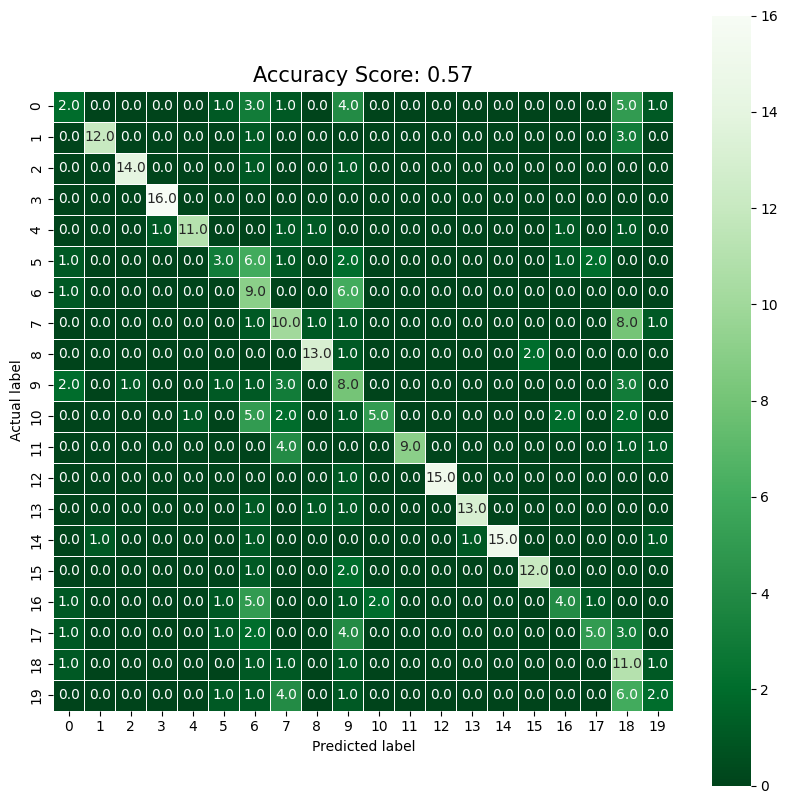

In [ ]:
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Get images and labels from the test generator
img, label = test_generator.next()

# Prediction using baseline_vgg
y_pred_probs = baseline_vgg.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get the category index with the highest probability in the prediction result
y_test = test_generator.classes  # Get the actual label index of all test images

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
print("Accuracy on test dataset:", accuracy)

# Create and display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {accuracy:.2f}', size=15)
plt.show()


##Visualizing predictions and actual images

1/1 [==============================] - 1s 798ms/step


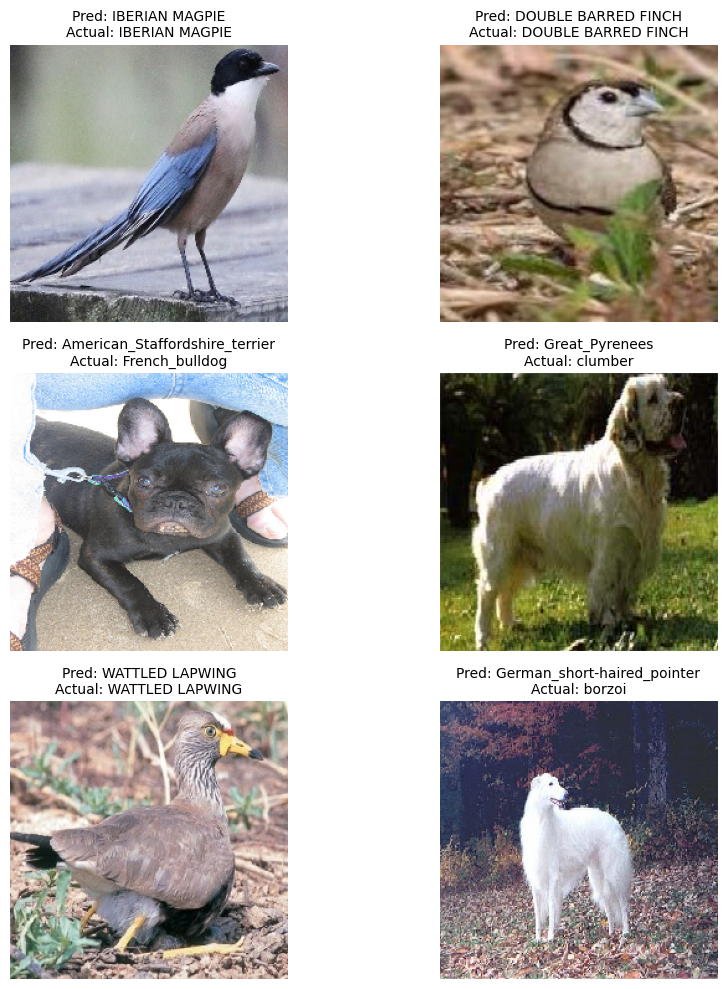

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Make sure there are enough images to choose from
test_imgs, test_labels = test_generator.next()
while len(test_imgs) < 100:
    imgs, labels = test_generator.next()
    test_imgs = np.concatenate((test_imgs, imgs))
    test_labels = np.concatenate((test_labels, labels))

# Randomly select 6 images
indices = np.random.choice(range(len(test_imgs)), 6, replace=False)
selected_imgs = test_imgs[indices]
selected_labels = test_labels[indices]

# Use the model to make predictions
predictions = baseline_vgg.predict(selected_imgs)

# Get a dictionary of category labels
label_map = {v: k for k, v in test_generator.class_indices.items()}

# Function: used to display a batch of images, predicted results and actual results
def plot_images(images, true_labels, preds):
    plt.figure(figsize=(10, 10))  # Adjust the canvas size to fit the display of 6 images
    for i in range(6):  # Display 6 images in a loop
        ax = plt.subplot(3, 2, i + 1)  # a layout of 3 rows and 2 columns
        plt.imshow(images[i])
        pred_label = label_map[np.argmax(preds[i])]
        true_label = label_map[np.argmax(true_labels[i])]
        plt.title(f"Pred: {pred_label}\nActual: {true_label}", fontsize=10)  # Spread title into two lines
        plt.axis("off")

# Show images, predictions and actuals
plot_images(selected_imgs, selected_labels, predictions)
plt.tight_layout()
plt.show()


#6. Customized Architecture - VGG16 Plus

In [ ]:
from tensorflow.keras import layers, models, Model

def custom_VGG16(input_shape=(224, 224, 3),n_classess=20):
    custom_model = models.Sequential()

    # Block 1
    custom_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=input_shape))
    custom_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    custom_model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    custom_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    custom_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    custom_model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    custom_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    custom_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    custom_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    custom_model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    custom_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    custom_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    custom_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    custom_model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    custom_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
    custom_model.add(layers.Conv2D(1024, (3, 3), activation='relu', padding='same', name='block5_conv2'))
    custom_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
    custom_model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    # Block 6
    custom_model.add(layers.Conv2D(1024, (3, 3), activation='relu', padding='same', name='block6_conv1'))
    custom_model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block6_conv2'))
    custom_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block6_conv3'))
    custom_model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block6_pool'))

    # Classification block
    custom_model.add(layers.Flatten(name='flatten'))
    custom_model.add(layers.Dense(1028, activation='relu', name='fc1'))
    custom_model.add(layers.Dropout(0.5))
    custom_model.add(layers.Dense(1028, activation='relu', name='fc2'))
    custom_model.add(layers.Dense(n_classess, activation='softmax', name='predictions'))

    return custom_model



In [ ]:
#from tensorflow.keras.applications import VGG16
from keras.layers import Dropout
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


custom_model = custom_VGG16(input_shape=(224, 224, 3),n_classess=20)


##Custom model summary

In [ ]:
custom_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

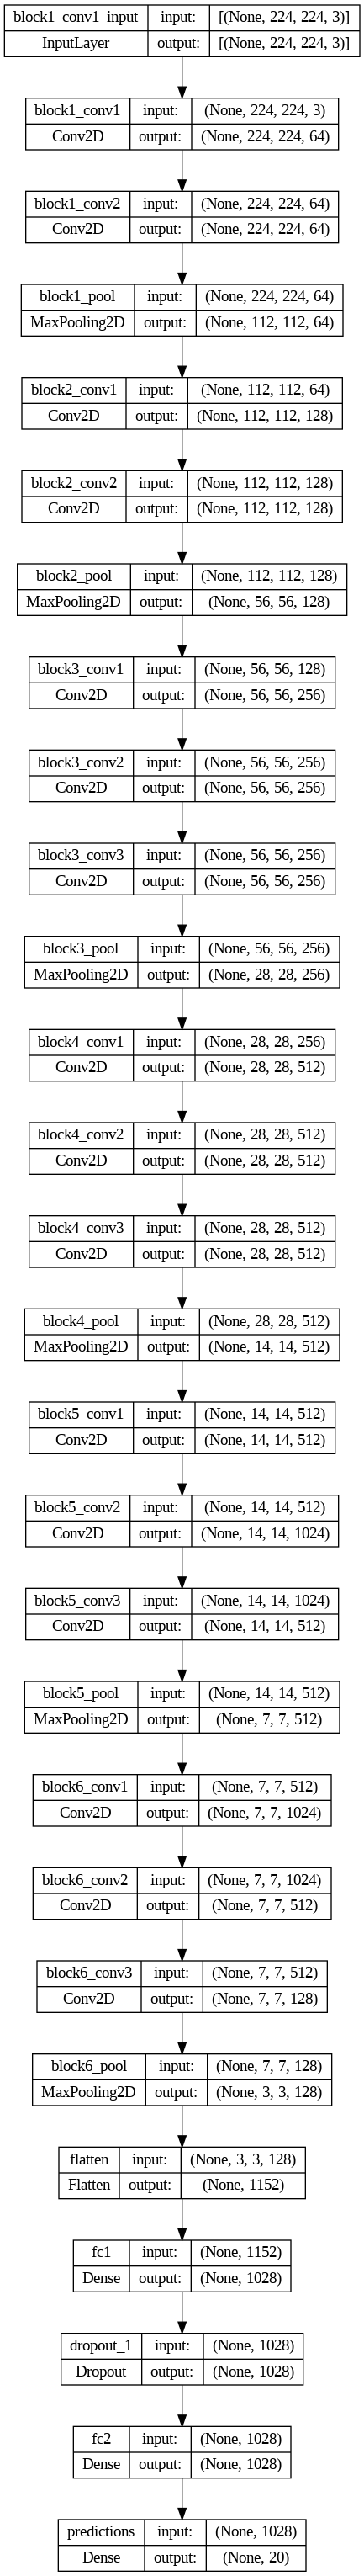

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(custom_model, show_shapes=True, show_layer_names=True)

##Training Model

In [ ]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

custom_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

filepath="/content/drive/MyDrive/Colab_Notebooks/42028/AT2/custom_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
batch_size=30
history = custom_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(train_generator.samples/batch_size),  # n images = batch_size * steps
      epochs=80,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples/batch_size),  # n images = batch_size * steps
      verbose=1)

<ipython-input-50-2e5624bad111>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = custom_model.fit_generator(


Epoch 1/80
86/86 [==============================] - 62s 711ms/step - loss: 2.9953 - acc: 0.0660 - val_loss: 2.9943 - val_acc: 0.0660
Epoch 2/80
86/86 [==============================] - 58s 680ms/step - loss: 2.9945 - acc: 0.0660 - val_loss: 2.9922 - val_acc: 0.0660
Epoch 3/80
86/86 [==============================] - 57s 666ms/step - loss: 2.9940 - acc: 0.0664 - val_loss: 2.9918 - val_acc: 0.0660
Epoch 4/80
86/86 [==============================] - 58s 675ms/step - loss: 2.9929 - acc: 0.0664 - val_loss: 2.9914 - val_acc: 0.0660
Epoch 5/80
86/86 [==============================] - 63s 730ms/step - loss: 2.9928 - acc: 0.0664 - val_loss: 2.9898 - val_acc: 0.0660
Epoch 6/80
86/86 [==============================] - 57s 670ms/step - loss: 2.9908 - acc: 0.0664 - val_loss: 2.9822 - val_acc: 0.0660
Epoch 7/80
86/86 [==============================] - 57s 666ms/step - loss: 2.9612 - acc: 0.0718 - val_loss: 2.9277 - val_acc: 0.0818
Epoch 8/80
86/86 [==============================] - 57s 664ms/step - 

##Save model into Google Drive



In [ ]:
custom_model.save('/content/drive/MyDrive/Colab_Notebooks/42028/AT2/vgg16Plus.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Load model from Google Drive

In [ ]:
from tensorflow import keras
custom_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/42028/AT2/vgg16Plus.h5')

##Draw training curve

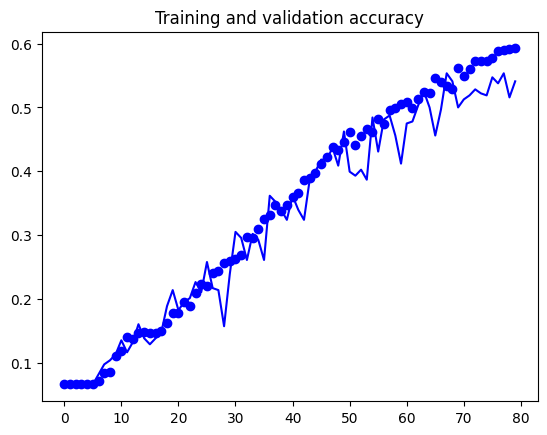

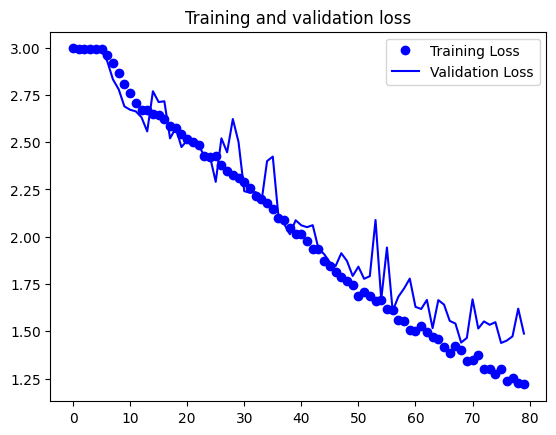

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print('Evaluation Train dataset',custom_model.evaluate(train_generator))
print('Evaluation Validation dataset',custom_model.evaluate(validation_generator))
print('Evaluation Test dataset',custom_model.evaluate(test_generator))

86/86 [==============================] - 49s 573ms/step - loss: 1.1586 - acc: 0.6177
Evaluation Train dataset [1.158614993095398, 0.6177274584770203]
11/11 [==============================] - 6s 501ms/step - loss: 1.4879 - acc: 0.5472
Evaluation Validation dataset [1.4878884553909302, 0.5471698045730591]
12/12 [==============================] - 2s 174ms/step - loss: 1.1319 - acc: 0.6344
Evaluation Test dataset [1.1319066286087036, 0.634441077709198]


##Find the incorrect image for the test set

In [ ]:
import numpy as np
print("softmax:",custom_model.predict(test_generator)[0])
print("ArgMax softmax: ",np.argmax(custom_model.predict(test_generator)[0]))
print("Result: ",test_generator.classes[0])

12/12 [==============================] - 2s 159ms/step
softmax: [2.0489231e-02 5.8290316e-04 3.0606861e-07 9.9503115e-05 5.7800894e-04
 7.3773608e-02 5.5474355e-03 3.4877715e-01 1.6891316e-03 2.9556340e-02
 6.1428087e-04 8.3351294e-03 1.8255358e-05 3.4041972e-05 4.1804033e-05
 8.6152846e-05 7.1908406e-04 6.1125343e-04 4.4873658e-01 5.9709817e-02]
12/12 [==============================] - 2s 197ms/step
ArgMax softmax:  18
Result:  0


##Confusion matrix

12/12 [==============================] - 4s 379ms/step
Accuracy on test dataset: 0.6344410876132931


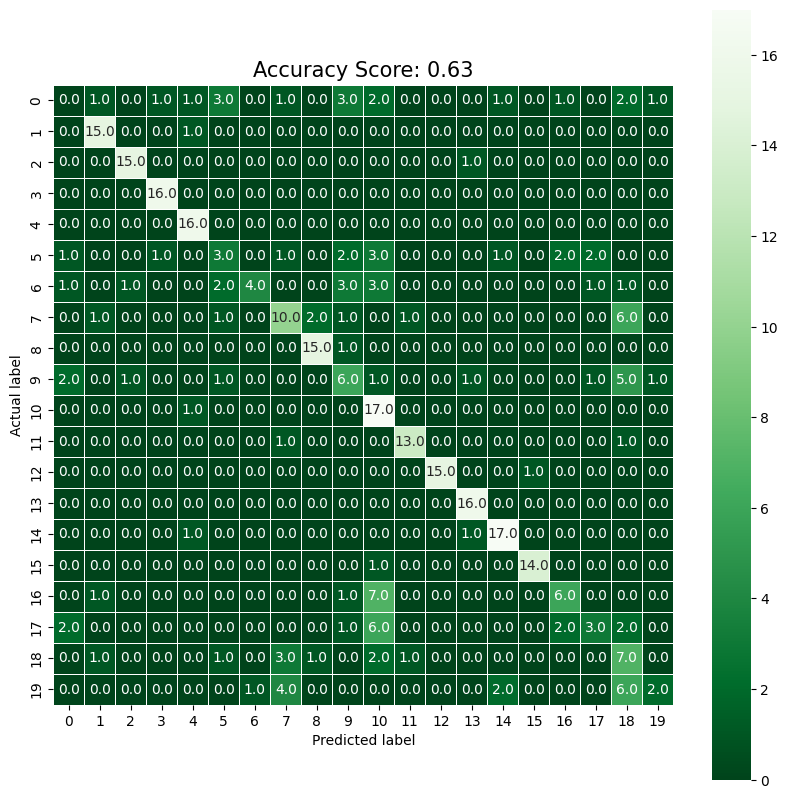

In [ ]:
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Get images and labels for display
img, label = test_generator.next()

# Use custom_model to make predictions
y_pred = custom_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the category index with the highest probability in the prediction result
y_test = test_generator.classes  # Get the actual label index of all test images

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
print("Accuracy on test dataset:", accuracy)

# Create and display confusion matric
cm = metrics.confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy Score: {accuracy:.2f}', size=15)
plt.show()



##Visualizing preductions and actual images

1/1 [==============================] - 1s 693ms/step


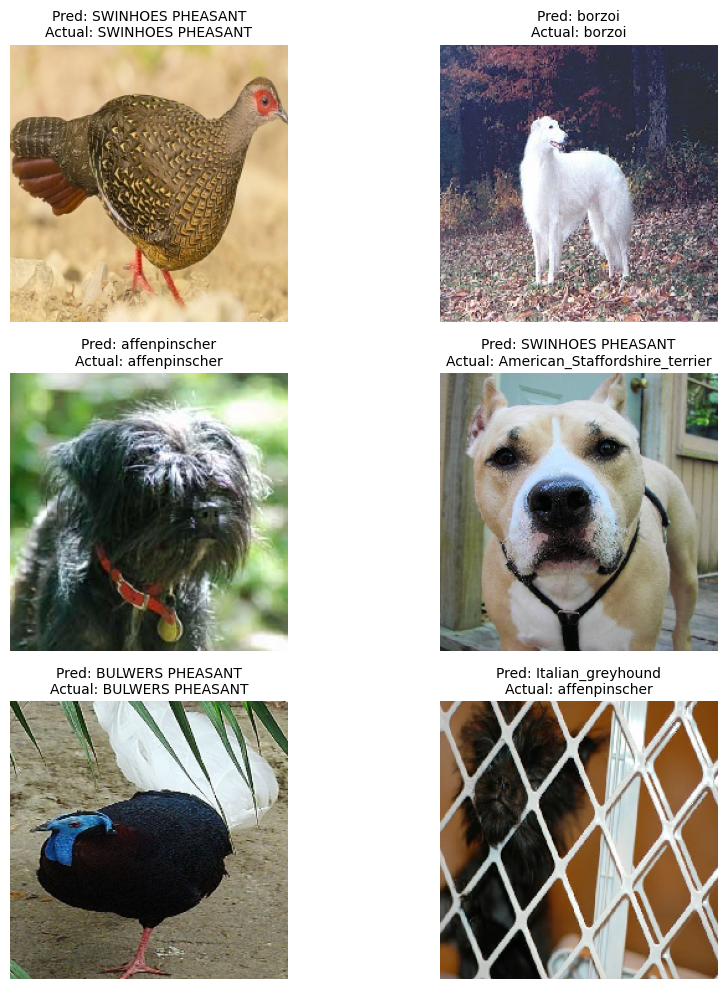

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Make sure there are enough images to choose from
test_imgs, test_labels = test_generator.next()
while len(test_imgs) < 100:
    imgs, labels = test_generator.next()
    test_imgs = np.concatenate((test_imgs, imgs))
    test_labels = np.concatenate((test_labels, labels))

# Randomly select 6 images
indices = np.random.choice(range(len(test_imgs)), 6, replace=False)
selected_imgs = test_imgs[indices]
selected_labels = test_labels[indices]

# Use the custom_model to make predictions
predictions = custom_model.predict(selected_imgs)

# Get a dictionary of category labels
label_map = {v: k for k, v in test_generator.class_indices.items()}

# Function: used to display a batch of images, predicted results and actual results
def plot_images(images, true_labels, preds):
    plt.figure(figsize=(10, 10))  # Adjust the canvas size to fit the display of 6 images
    for i in range(6):  # Display 6 images in a loop
        ax = plt.subplot(3, 2, i + 1)  # a layout of 3 rows and 2 columns
        plt.imshow(images[i])
        pred_label = label_map[np.argmax(preds[i])]
        true_label = label_map[np.argmax(true_labels[i])]
        plt.title(f"Pred: {pred_label}\nActual: {true_label}", fontsize=10)  # Spread title into two lines
        plt.axis("off")

# Display images, predictions and actuals
plot_images(selected_imgs, selected_labels, predictions)
plt.tight_layout()
plt.show()